## K-Means

In [27]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [51]:
data = pd.read_csv('./world-data-2023.csv')
# filter data
columns_to_include = ['Fertility Rate', 'Birth Rate', 'Life expectancy']
data = data[columns_to_include]

# Drop null rows
data = data.dropna()
data = data.reset_index(drop=True)

#### PART 1: Data Preprocessing

In [52]:
# TODO Implement these 3 cleaning functions (not always used)
def clean_monetary_value(value):
    return float(str(value).replace("$",""))

def clean_string_with_comma(value):
    return float(str(value).replace(",",""))

def clean_percentage(value):
    return float(str(value).replace("%",""))

# put variables together
x = []
for i in range(len(data)):
    x.append([clean_monetary_value(data[columns_to_include[0]][i]), (data[columns_to_include[1]][i]), (data[columns_to_include[2]][i])])


### PART 2: Find Optimal K

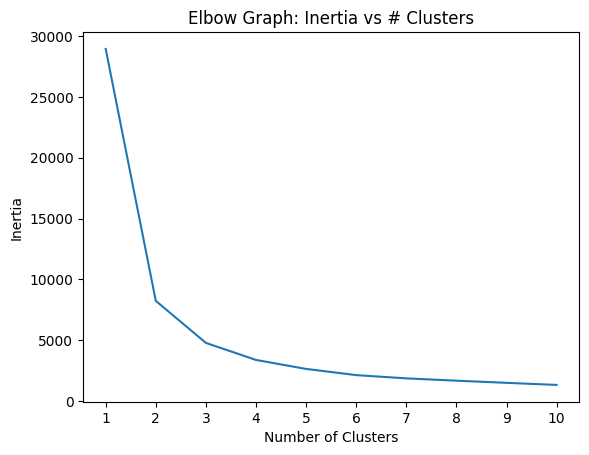

In [53]:
sse = []
num_iterations = 10 # iterations
num_max_iter = 300 # max iterations

for i in range(1,11):
    num_c = i # clusters

    # initialize k-means
    km = KMeans(n_clusters=num_c, n_init=num_iterations, max_iter=num_max_iter)

    # fit and predict
    y_km = km.fit_predict(x)

    sse.append(km.inertia_)

# plot elbow graph
plt.plot(sse)
# reset x ticks to match num_clusters
plt.xticks(range(0,10), range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph: Inertia vs # Clusters')
plt.show()

Visualization

Centroids locations:
 [[ 2.47440678 19.83101695 72.61016949]
 [ 4.45740741 33.73907407 63.01296296]
 [ 1.61202703 11.02148649 78.77837838]]
[     Fertility Rate  Birth Rate  Life expectancy  cluster
2              3.02       24.28             76.7        0
5              2.26       17.02             76.5        0
9              1.73       14.00             72.9        0
12             2.04       18.18             72.3        0
16             2.31       20.79             74.5        0
18             1.98       17.26             71.5        0
19             2.73       21.75             71.2        0
21             2.87       24.82             69.3        0
28             2.27       19.49             72.8        0
29             2.50       22.46             69.6        0
46             2.73       21.47             66.6        0
48             2.35       19.51             73.9        0
49             2.43       19.72             76.8        0
50             3.33       26.38             71.

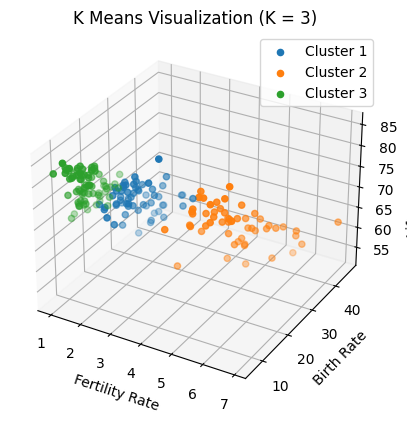

In [54]:
def visualize_clusters(clusters):
    # plot clusters
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    # add each cluster to graph and legend
    for i, cluster in enumerate(clusters):
        ax.scatter(cluster[columns_to_include[0]], cluster[columns_to_include[1]], cluster[columns_to_include[2]], label=f'Cluster {i+1}')

    ax.set_xlabel(columns_to_include[0])
    ax.set_ylabel(columns_to_include[1])
    ax.set_zlabel(columns_to_include[2])
    plt.title(f'K Means Visualization (K = {len(clusters)})')
    # add legend
    ax.legend()  
    plt.show()


# enter the optimal number of clusters determined from elbow graph
num_clusters =  3


num_iterations = 10 # iterations
num_max_iter = 300 # max iterations

# initialize k-means
km = KMeans(n_clusters=num_clusters, n_init=num_iterations, max_iter=num_max_iter)

# fit and predict
y_km = km.fit_predict(x)

# get centroid locations
c_centers = km.cluster_centers_
print('Centroids locations:\n', c_centers)

# add assigned cluster to dataframe
clustered_data = data.copy()
clustered_data['cluster'] = y_km

clusters = []

# separate clustered_data into its respective clusters. You should have k clusters (likely k dataframes with the relevant). Add each cluster/dataframe to the clusters list
centroid_zero = clustered_data.loc[clustered_data['cluster']==0]
centroid_one = clustered_data.loc[clustered_data['cluster']==1]
centroid_two = clustered_data.loc[clustered_data['cluster']==2]

# add each cluster to clusters list
clusters.append(centroid_zero)
clusters.append(centroid_one)
clusters.append(centroid_two)

print(clusters)

# visualize
visualize_clusters(clusters)

### PART 3: K-Means

     Fertility Rate  Birth Rate  Life expectancy  Closest Centroid
0              4.47       32.49             64.5                 2
1              1.62       11.78             78.5                 1
2              3.02       24.28             76.7                 2
3              5.52       40.73             60.8                 2
4              1.99       15.33             76.9                 1
..              ...         ...              ...               ...
182            2.27       17.88             72.1                 1
183            2.05       16.75             75.3                 1
184            3.79       30.45             66.1                 2
185            4.63       36.19             63.5                 2
186            3.62       30.68             61.2                 2

[187 rows x 4 columns]
     Fertility Rate  Birth Rate  Life expectancy  Closest Centroid
120            6.91       46.08             62.0                 2
81             1.98       16.10       

KeyError: 'Fertility Rate'

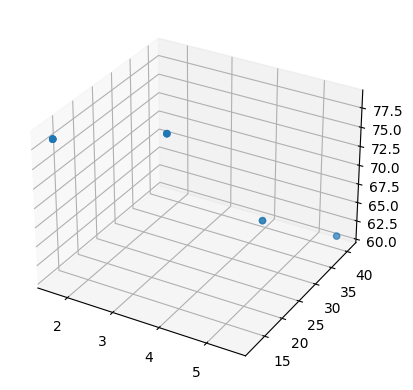

In [41]:
'''
TODO While implementation is up to you, the visualization function takes in a list of K dataframes, representing the K clusters. 
Feel free to edit the parameters and starter code as needed. You must have num_clusters (K) as a parameter though. 
Hint: build helper functions.
'''
def kmeans(num_clusters, data):

    num = num_clusters

    print(data)

    # store previous centroids for comparison
    # initialize as empty
    previous_centroids = dict()
    for i in range(num):
        previous_centroids[i] = (0,0,0)
    
    current_centroids = get_first_centroids(num, data)

    previous_centroids, current_centroids = calculate_new_centroids(num, data, current_centroids)


    # call get_new_centroids until new centroids are equal to previous centroids
    while close_enough(previous_centroids,current_centroids,0.001):
        previous_centroids, current_centroids = calculate_new_centroids(num, data, previous_centroids)

    
    final_dataframes_list = list()

    for i in range(num):
        final_dataframes_list.append(list())

    for index, value in enumerate(data):

        row = data.iloc[index]
        for key, value in current_centroids.items():
            final_dataframes_list[get_nearest_centroid(row, current_centroids)].append(row)
    
    final_dataframes = list()

    for dataframe in final_dataframes_list:
        final_dataframes.append(pd.DataFrame(dataframe))

    return final_dataframes

def close_enough(previous, current, threshold):
    for key in previous.keys():
        if key in current and abs(previous[key] - current[key]) >= threshold:
            return True
    return False





def get_first_centroids(num, data):
    # get num random rows from data, and store into new dataframe
    centroids_df = data.sample(num)

    print(centroids_df)
    #turn that dataframe into a dictionary
    centroids = dict()
    for index, row in centroids_df.iterrows():

        centroids[index] = (row[columns_to_include[0]], row[columns_to_include[1]], row[columns_to_include[2]])
    
    # return the dictionary of initial centroids:
    return centroids


def get_nearest_centroid(row, centroids):
    # get the row as a dictionary, formatted same as centroids
    point = list()
    for item in row:
        point.append(item)

    # create dictionary to store distances
    distances = dict()
    # loop through each centroid and calculate the distance between it and the point in the row
    for index, centroid in enumerate(centroids.items()):
        distances[index] = get_distance(point, centroid)

    return min(distances, key=distances.get)

def get_distance(point, centroid):
    centroid_list = list(centroid[1])
    return math.sqrt((point[0]-centroid_list[0])**2 + (point[1]-centroid_list[1])**2 + (point[2]-centroid_list[2])**2)

def calculate_new_centroids(num, dataset, old_centroids):

    # store the centroids as a dictionary, with key being centroid number and value being centroid point (tuple)
    centroids = dict()
    for i in range(num):
        centroids[i] = (0,0,0)

    length = len(dataset)


    # QUESTION FOR TA'S: HOW DO I ACCESS A ROW FROM MY DATASET????
    for index, value in enumerate(dataset):

        row = dataset.iloc[index]
        #centroids[get_nearest_centroid(row, old_centroids)] += (row[0]/length, row[1]/length, row[2]/length)
        dataset['Closest Centroid'] = get_nearest_centroid(row, old_centroids)


    for index, row in dataset.iterrows():
        dataset.at[index, 'Closest Centroid'] = get_nearest_centroid(row, old_centroids)



# add a column to the dataframe called nearest centroid/centroid assignment, put in index 0, 1, or 2 as the value here
        # get nearest centroid is good but only use it once. Store it in new column
        # loop through 0, 1, 2 as (i), for data[i] centroid thing, average them.
        #points = data.iloc[data['closest centroid']==0]
    return old_centroids, centroids



# Call K means function 
clusters = kmeans(num_clusters=3, data=data)
print(clusters)
# visualize clusters
visualize_clusters(clusters)

### PART 4: Self-Guided Analysis
Now that you've implemented K-Means, seeing how the data is clustered based on different features from the dataset should be easy! The only thing you should need to change is the 'columns_to_include' variable at the beginning of the file, apply the data cleaning if needed, and change the optimal 'num_clusters' depending on your elbow graph.